We want to show the Electric, Magnetic, and Pixel Intensity from Swarm B

In [1]:
import numpy as np #Lets handle our imports now for section A
import matplotlib.pyplot as plt
import asilib
import asilib.asi
from datetime import datetime, timedelta
from scipy.optimize import curve_fit
from viresclient import set_token
from viresclient import SwarmRequest
import geopack.geopack as gp

import scienceplots

plt.style.use(['science','no-latex'])
alt=110

Load IGRF coefficients ...


In [2]:
time_array=(datetime(2022,12,19,14,4), datetime(2022,12,19,14,6))

In [3]:
#From documentation link
def requester(sc_collection, measurement, residual, sampling_step=None, **kwargs):
    try:
        request = SwarmRequest()
        request.set_collection(sc_collection)
        if residual == True:
            request.set_products(
                measurements=measurement,
                models=["CHAOS"],
                residuals=True,
                sampling_step=sampling_step,
            )
        else:
            request.set_products(
                measurements=measurement,
                models=["CHAOS"],
                sampling_step=sampling_step,
            )
        data = request.get_between(time_array[0], time_array[1], **kwargs) #sets to get data between the first and last value in the time tuple
        df = data.as_dataframe()
    except:
        df = []
    return df

In [4]:
def arrangement(time, array, shape):  # arranges B into a useable format for use later
    barranged = np.zeros((len(time), shape))
    # Re-arranges into proper (n x 3 ) matricies, ugly but works
    for j in range(len(time)):
        for k in range(shape):
            barranged[j][k] = array[j][k]
    return barranged

In [5]:
def unit_array(array):
    arraysum = np.sum(np.abs(array), axis=1)
    # Normalizes and finds unitary
    array_unit = array / arraysum[:, np.newaxis]  # normalizes
    return array_unit

In [6]:
#Lets do B first
ds = requester( 
    "SW_OPER_MAGB_HR_1B", #Mag B, high resolution, 50Hz B (Magnetic field)
    "B_NEC", #Magnetic field in NEC coordinates
    True, 
    asynchronous=False,
    show_progress=False) 
print(ds)
BNEC=ds["B_NEC_res_CHAOS"]
Btime = BNEC.index.to_numpy()
BNEC = arrangement(Btime, ds["B_NEC_res_CHAOS"], 3)




                                Latitude  \
Timestamp                                  
2022-12-19 14:04:00.010546944  65.407503   
2022-12-19 14:04:00.030546944  65.406239   
2022-12-19 14:04:00.050546944  65.404975   
2022-12-19 14:04:00.070546944  65.403711   
2022-12-19 14:04:00.090546944  65.402447   
...                                  ...   
2022-12-19 14:05:59.902414080  57.822759   
2022-12-19 14:05:59.922414080  57.821493   
2022-12-19 14:05:59.942414080  57.820226   
2022-12-19 14:05:59.962414080  57.818960   
2022-12-19 14:05:59.982414080  57.817694   

                                                                 B_NEC_res_CHAOS  \
Timestamp                                                                          
2022-12-19 14:04:00.010546944  [82.78851767348624, -138.16134622453387, 36.38...   
2022-12-19 14:04:00.030546944  [82.75096559278973, -138.28340700805347, 36.37...   
2022-12-19 14:04:00.050546944  [82.6129967472325, -138.48937014403464, 36.388...   
2022-12

C:\Users\1101w\AppData\Local\Temp\ipykernel_17312\2246279540.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  barranged[j][k] = array[j][k]


In [7]:
from scipy.spatial.transform import Rotation as R
import numpy as np

def quaternion_inverse_scipy(q):
    # Ensure q is a numpy array
    q = np.asarray(q)
    
    # Create a Rotation object from the quaternion
    rotation = R.from_quat(q)  # Note: scipy uses [x, y, z, w] format
    
    # Compute the inverse rotation
    inverse_rotation = rotation.inv()
    
    
    return inverse_rotation

In [8]:

def find_closest_indices(times1, times2):
    # Convert to numpy arrays
    times1 = np.array(times1)
    times2 = np.array(times2)
    
    # Compute the differences between each time in times1 and all times in times2
    # Resulting in a 2D array where each row contains the absolute differences for one time in times1
    differences = np.abs(times1[:, None] - times2)
    
    # Find the index of the minimum difference for each time in times1
    closest_indices = np.argmin(differences, axis=1)
    
    return closest_indices

In [9]:
measurements_E = [
        "VsatN",
        "VsatE",
        "VsatC",
        "Evx",
        "Evy",
        "Evz",
        "Vixv",
        "Viy",
        "Viz",
        "Quality_flags",
    ]
ds = requester( 
    "SW_EXPT_EFIB_TCT16", #Mag B, high resolution, 50Hz B (Magnetic field)
    measurements_E, #Magnetic field in NEC coordinates
    True, 
    asynchronous=False,
    show_progress=False) 
print(ds)
dsB = requester( 
    'SW_OPER_MAGB_HR_1B', #Mag B, high resolution, 50Hz B (Magnetic field)
    ["q_NEC_CRF"], #Magnetic field in NEC coordinates
    False, 
    asynchronous=False,
    show_progress=False)

latitude, longitude, altitude = dsB['Latitude'].to_numpy(), dsB['Longitude'].to_numpy(),  (dsB["Radius"].to_numpy()-6.371e6)/1e3 #km  # Gets Emphermis data


                                     VsatN  Quality_flags     Radius  \
Timestamp                                                              
2022-12-19 14:04:00.006750208 -7580.783203              4  6872232.0   
2022-12-19 14:04:00.068749824 -7580.793457              4  6872232.5   
2022-12-19 14:04:00.131750144 -7580.804199              4  6872233.0   
2022-12-19 14:04:00.193750016 -7580.814453              4  6872233.5   
2022-12-19 14:04:00.256750080 -7580.824707              4  6872233.5   
...                                    ...            ...        ...   
2022-12-19 14:05:59.693750016 -7594.200195              4  6873200.0   
2022-12-19 14:05:59.756750080 -7594.205078              4  6873200.5   
2022-12-19 14:05:59.818749952 -7594.209473              4  6873201.0   
2022-12-19 14:05:59.881750016 -7594.214355              4  6873201.5   
2022-12-19 14:05:59.943749888 -7594.218750              4  6873202.0   

                              Spacecraft      VsatC   Longitude

In [10]:
t1 = time_array[0]
t0 = datetime(1970,1,1)
ut = (t1-t0).total_seconds()
lat_sat=np.deg2rad(latitude)
lon_sat=np.deg2rad(longitude)
gp.recalc(ut)
print(altitude)
r, theta= gp.geodgeo(altitude,lat_sat,1) #TODO magically, r is 10km less than if you calculated r manually, is this real

x_gc,y_gc,z_gc = gp.sphcar((r)/6371,theta,lon_sat,1)  #spherical to cartesian
 

x_gsm, y_gsm, z_gsm = gp.geogsm(x_gc,y_gc,z_gc, 1) #cartesian to gsm

x_foot,y_foot,z_foot=np.zeros(len(x_gsm)), np.zeros(len(y_gsm)), np.zeros(len(z_gsm)) #initalize an array


[501.23882 501.23896 501.2391  ... 502.21054 502.21072 502.2109 ]


In [11]:
for index in range(len(x_gsm)):
    x_foot_int, y_foot_int, z_foot_int, xx, _,zz = gp.trace(x_gsm[index], y_gsm[index], z_gsm[index], dir=1,rlim=2, r0=(alt-10+6371)/6371, maxloop=300 ) #traces each set of lat,lon,alt outward
    _, _, _, xx2,yy2,zz2 = gp.trace(x_foot_int, y_foot_int, z_foot_int, dir=-1,rlim=100, r0=(alt-10+6371)/6371, maxloop=1000 )#Traces inward
    def curve_fit_func():
        def cubic(t, a, b, c, d):
            return a*t**3 + b*t**2 + c*t + d
        r = np.linspace(1, 1.5, 100000)

        radius_data=np.sqrt(xx2**2+yy2**2+zz2**2)

        params_x, _ = curve_fit(cubic, radius_data, xx2) #Constructs fits on the traces inward since the spatial resolution produced by geopack is limited.
        params_y, _ = curve_fit(cubic, radius_data, yy2)
        params_z, _ = curve_fit(cubic, radius_data, zz2)

        def x(t):
            return cubic(t, *params_x)

        def y(t):
            return cubic(t, *params_y)

        def z(t):
            return cubic(t, *params_z)
        def radius(t):
            return np.sqrt(x(t)**2 + y(t)**2 + z(t)**2)

        index_closest=np.argmin(np.abs(radius(r)-(alt-10+6371)/6371))

        return x(r[index_closest]),y(r[index_closest]),z(r[index_closest])

    x_foot[index],y_foot[index],z_foot[index] = curve_fit_func()

x_done, y_done, z_done = gp.geogsm(x_foot, y_foot, z_foot, -1)

alt_sat_done_B, lat_sat_done_B,lon_sat_done_B = np.zeros(len(x_done)), np.zeros(len(x_done)), np.zeros(len(x_done))
for index in range(len(x_done)):
    
    r_done,theta_done,lon_sat_done_B[index]= gp.sphcar(x_done[index], y_done[index], z_done[index],-1)

    alt_sat_done_B[index], lat_sat_done_B[index]= gp.geodgeo(r_done*6371,theta_done,-1) #TODO check if this is right

print(alt_sat_done_B, 'altitude derived from fit')

if np.any(np.abs(alt_sat_done_B - alt) > 5):
    raise Exception("One or more values in the footprinting are greater than 5km away from the specified alt. Contact owner for a fix, not your fault")



[110.64125191 110.64090562 110.64055842 ... 108.38770821 108.38730207
 108.38689598] altitude derived from fit


In [12]:
indicies=find_closest_indices(ds.index, dsB.index)
quatnecrf=dsB["q_NEC_CRF"].to_numpy()[indicies]
quaternions = []
Esat=np.array([ds["Evx"] , ds["Evy"], ds["Evz"]]).T
vsat=np.array([ds["Vixv"] , ds["Viy"], ds["Viz"]]).T
Etime = ds.index
ENEC=[]
VNEC=[]
for i in range(len(quatnecrf)):
    inverse_quat = quaternion_inverse_scipy(dsB["q_NEC_CRF"].to_numpy()[indicies][i])
    rot_NEC_V= inverse_quat.apply(Esat[i])
    ENEC.append(rot_NEC_V)

    rot_NEC_V= inverse_quat.apply(vsat[i])
    VNEC.append(rot_NEC_V)

ENEC=np.array(ENEC)
VNEC=np.array(VNEC)


Now for the hard part, the pixel intensity
Since the satellite as seen in figure 1 passes through the arc pretty fast, we should increase the resolution of the pixel intensity by super imposing 

Lets define the imager

In [13]:
latitude, longitude, altitude = ds['Latitude'].to_numpy(), ds['Longitude'].to_numpy(),  (ds["Radius"].to_numpy()-6.371e6)/1e3 #km  # Gets Emphermis data

alt=110

In [14]:
asi=asilib.asi.trex_rgb(location_code='yknf', alt=110, time_range=time_array, colors='r')


Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


In [15]:
t1 = time_array[0]
t0 = datetime(1970,1,1)
ut = (t1-t0).total_seconds()
lat_sat=np.deg2rad(latitude)
lon_sat=np.deg2rad(longitude)
gp.recalc(ut)
print(altitude)
r, theta= gp.geodgeo(altitude,lat_sat,1) #TODO magically, r is 10km less than if you calculated r manually, is this real

x_gc,y_gc,z_gc = gp.sphcar((r)/6371,theta,lon_sat,1)  #spherical to cartesian
 

x_gsm, y_gsm, z_gsm = gp.geogsm(x_gc,y_gc,z_gc, 1) #cartesian to gsm

x_foot,y_foot,z_foot=np.zeros(len(x_gsm)), np.zeros(len(y_gsm)), np.zeros(len(z_gsm)) #initalize an array


[501.232  501.2325 501.233  ... 502.201  502.2015 502.202 ]


In [16]:
for index in range(len(x_gsm)):
    x_foot_int, y_foot_int, z_foot_int, xx, _,zz = gp.trace(x_gsm[index], y_gsm[index], z_gsm[index], dir=1,rlim=2, r0=(alt-10+6371)/6371, maxloop=300 ) #traces each set of lat,lon,alt outward
    _, _, _, xx2,yy2,zz2 = gp.trace(x_foot_int, y_foot_int, z_foot_int, dir=-1,rlim=100, r0=(alt-10+6371)/6371, maxloop=1000 )#Traces inward
    def curve_fit_func():
        def cubic(t, a, b, c, d):
            return a*t**3 + b*t**2 + c*t + d
        r = np.linspace(1, 1.5, 100000)

        radius_data=np.sqrt(xx2**2+yy2**2+zz2**2)

        params_x, _ = curve_fit(cubic, radius_data, xx2) #Constructs fits on the traces inward since the spatial resolution produced by geopack is limited.
        params_y, _ = curve_fit(cubic, radius_data, yy2)
        params_z, _ = curve_fit(cubic, radius_data, zz2)

        def x(t):
            return cubic(t, *params_x)

        def y(t):
            return cubic(t, *params_y)

        def z(t):
            return cubic(t, *params_z)
        def radius(t):
            return np.sqrt(x(t)**2 + y(t)**2 + z(t)**2)

        index_closest=np.argmin(np.abs(radius(r)-(alt-10+6371)/6371))

        return x(r[index_closest]),y(r[index_closest]),z(r[index_closest])

    x_foot[index],y_foot[index],z_foot[index] = curve_fit_func()

x_done, y_done, z_done = gp.geogsm(x_foot, y_foot, z_foot, -1)

alt_sat_done_E, lat_sat_done_E,lon_sat_done_E = np.zeros(len(x_done)), np.zeros(len(x_done)), np.zeros(len(x_done))
for index in range(len(x_done)):
    
    r_done,theta_done,lon_sat_done_E[index]= gp.sphcar(x_done[index], y_done[index], z_done[index],-1)

    alt_sat_done_E[index], lat_sat_done_E[index]= gp.geodgeo(r_done*6371,theta_done,-1) #TODO check if this is right

print(alt_sat_done_E, 'altitude derived from fit')

if np.any(np.abs(alt_sat_done_E - alt) > 5):
    raise Exception("One or more values in the footprinting are greater than 5km away from the specified alt. Contact owner for a fix, not your fault")
print(np.rad2deg(lon_sat_done_E)-360,np.rad2deg(lat_sat_done_E) , 'lat and lon' )
sat_lla=np.array([np.rad2deg(lat_sat_done_E), np.rad2deg(lon_sat_done_E)-360, alt_sat_done_E]).T

conjunction_obj = asilib.Conjunction(asi, (np.array(Etime), sat_lla))

[110.65753726 110.65646476 110.65537568 ... 108.40921165 108.40793149
 108.40667617] altitude derived from fit
[-117.75997735 -117.75932394 -117.75866014 ... -116.88317609 -116.88286015
 -116.88257492] [65.95205044 65.94824744 65.94439018 ... 58.62679445 58.62295159
 58.61918566] lat and lon


In [17]:
#Now lets 

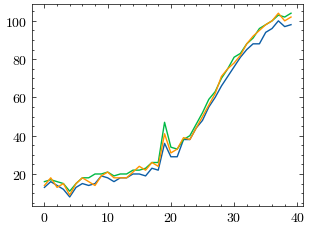

In [32]:
sat_azimuth_elevation, sat_azel_pixels = conjunction_obj.map_azel()
area_intensity = conjunction_obj.intensity()
area_mask = conjunction_obj.equal_area(box=(10,10))
# Need to change masked NaNs to 0s so we can plot the rectangular area contours.
area_mask[np.where(np.isnan(area_mask))] = 0
plt.plot(area_intensity) #This gives us a resolution of 3Hz.


Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


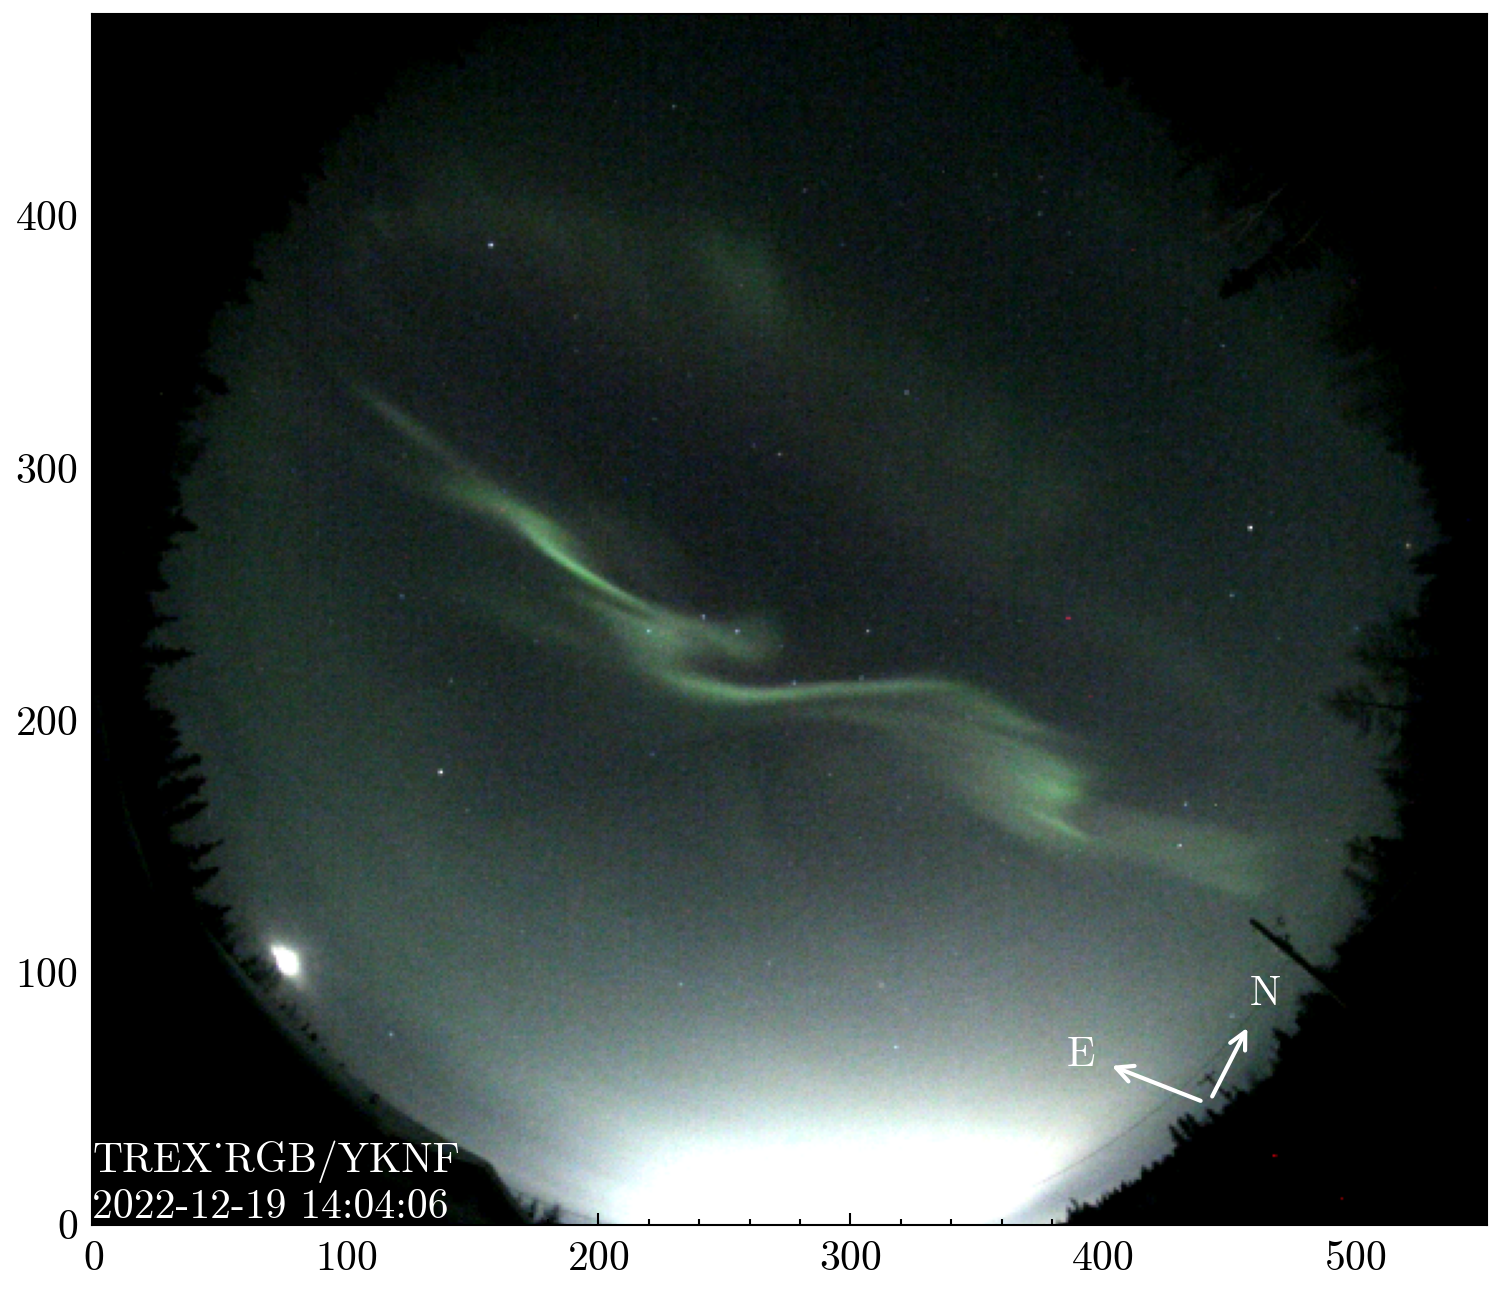

In [33]:
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
asi_single=asilib.asi.trex_rgb(location_code='yknf', alt=110, time=datetime(2022,12,19,14,4,5), colors='rgb')

ax, im_good = asi_single.plot_fisheye(ax=ax)


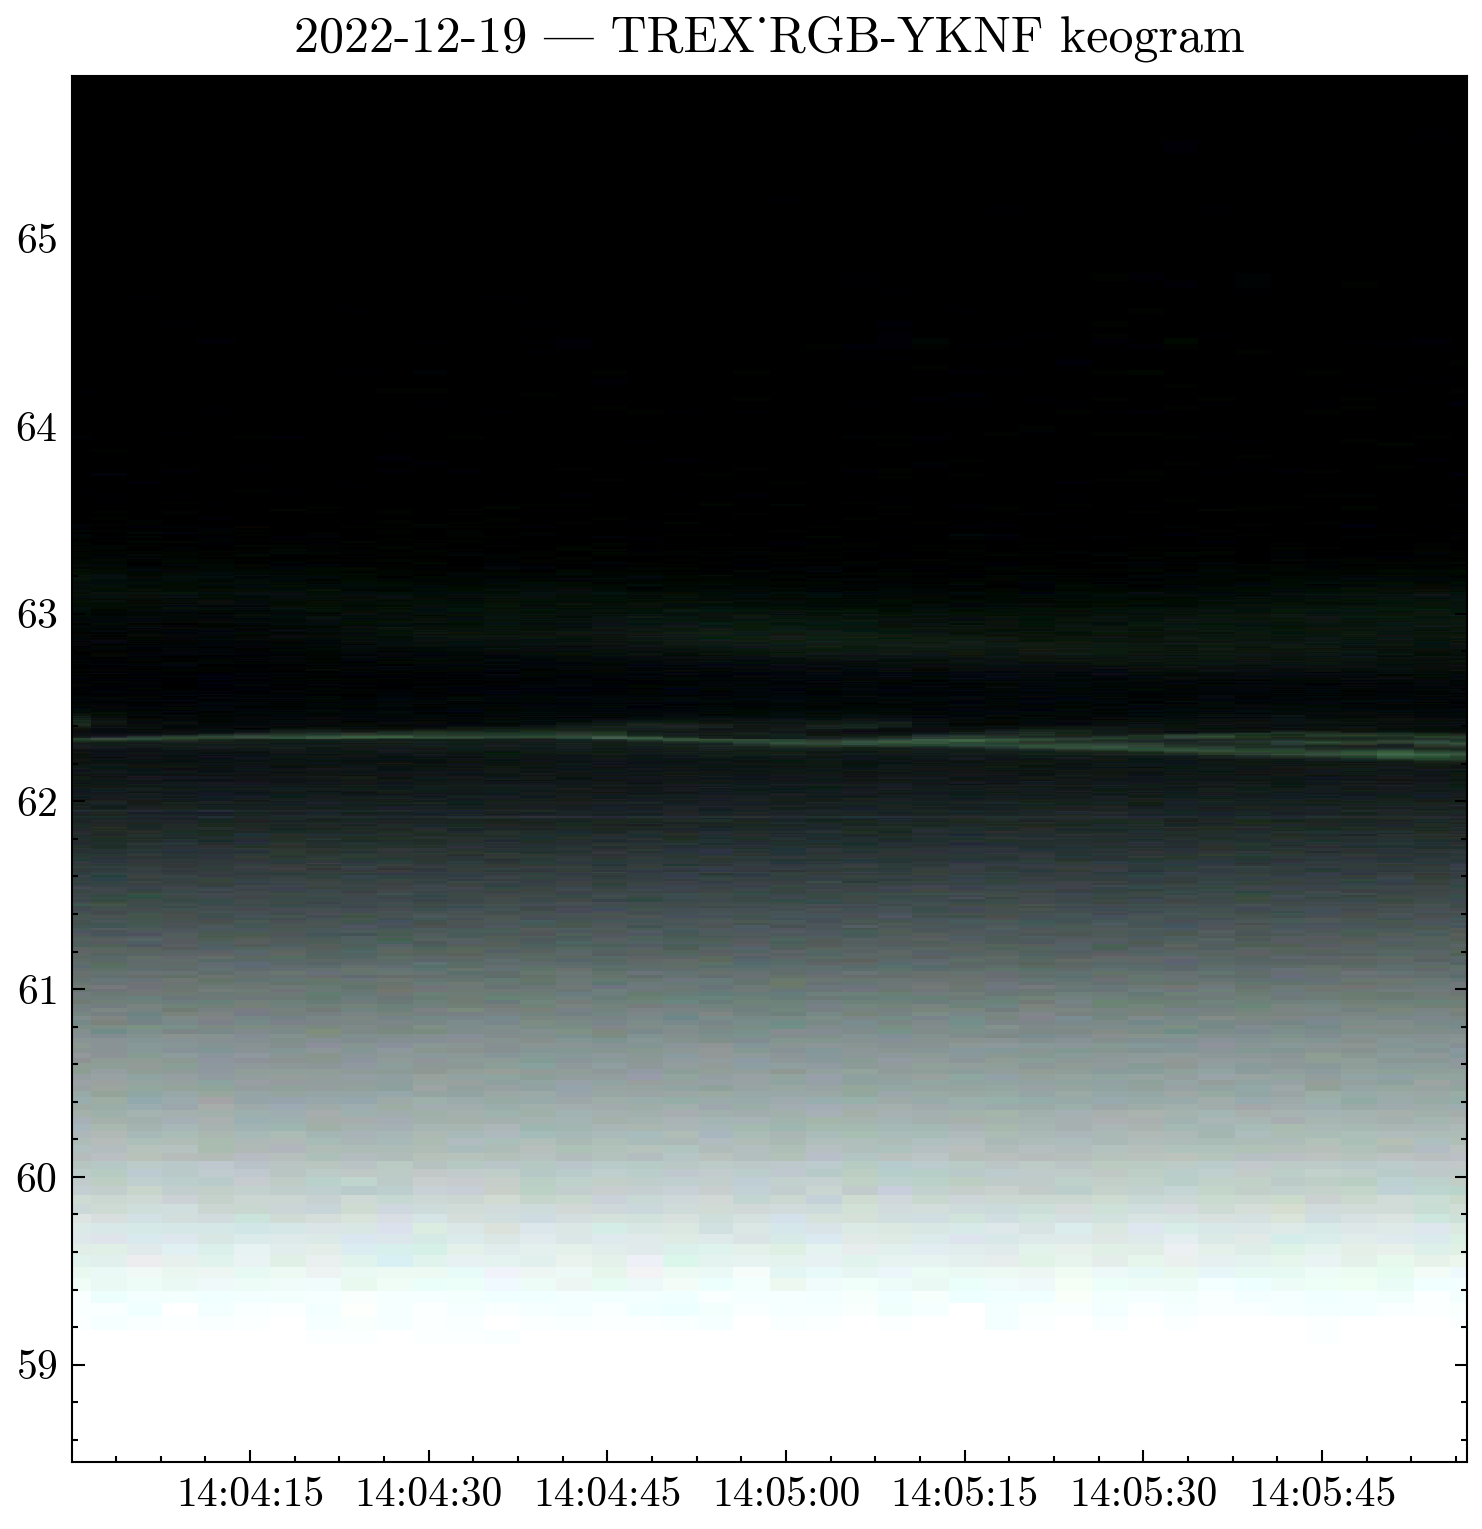

In [34]:
fig, axes = plt.subplots(figsize=(6,6), dpi=300)
axes,im = asi.plot_keogram(ax=axes)
x_data = im.get_coordinates()[:, 0, 1]
y_data = im.get_coordinates()[:, 1, 1]



In [35]:
lat16 = np.rad2deg(lat_sat_done_E)
lat50 = np.rad2deg(lat_sat_done_B)

We want our plots to have lat verus data


(40, 3)


C:\Users\1101w\AppData\Local\Temp\ipykernel_17312\2664741365.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.3, w_pad=0.6, h_pad=0.35)


(59.0, 65.6)

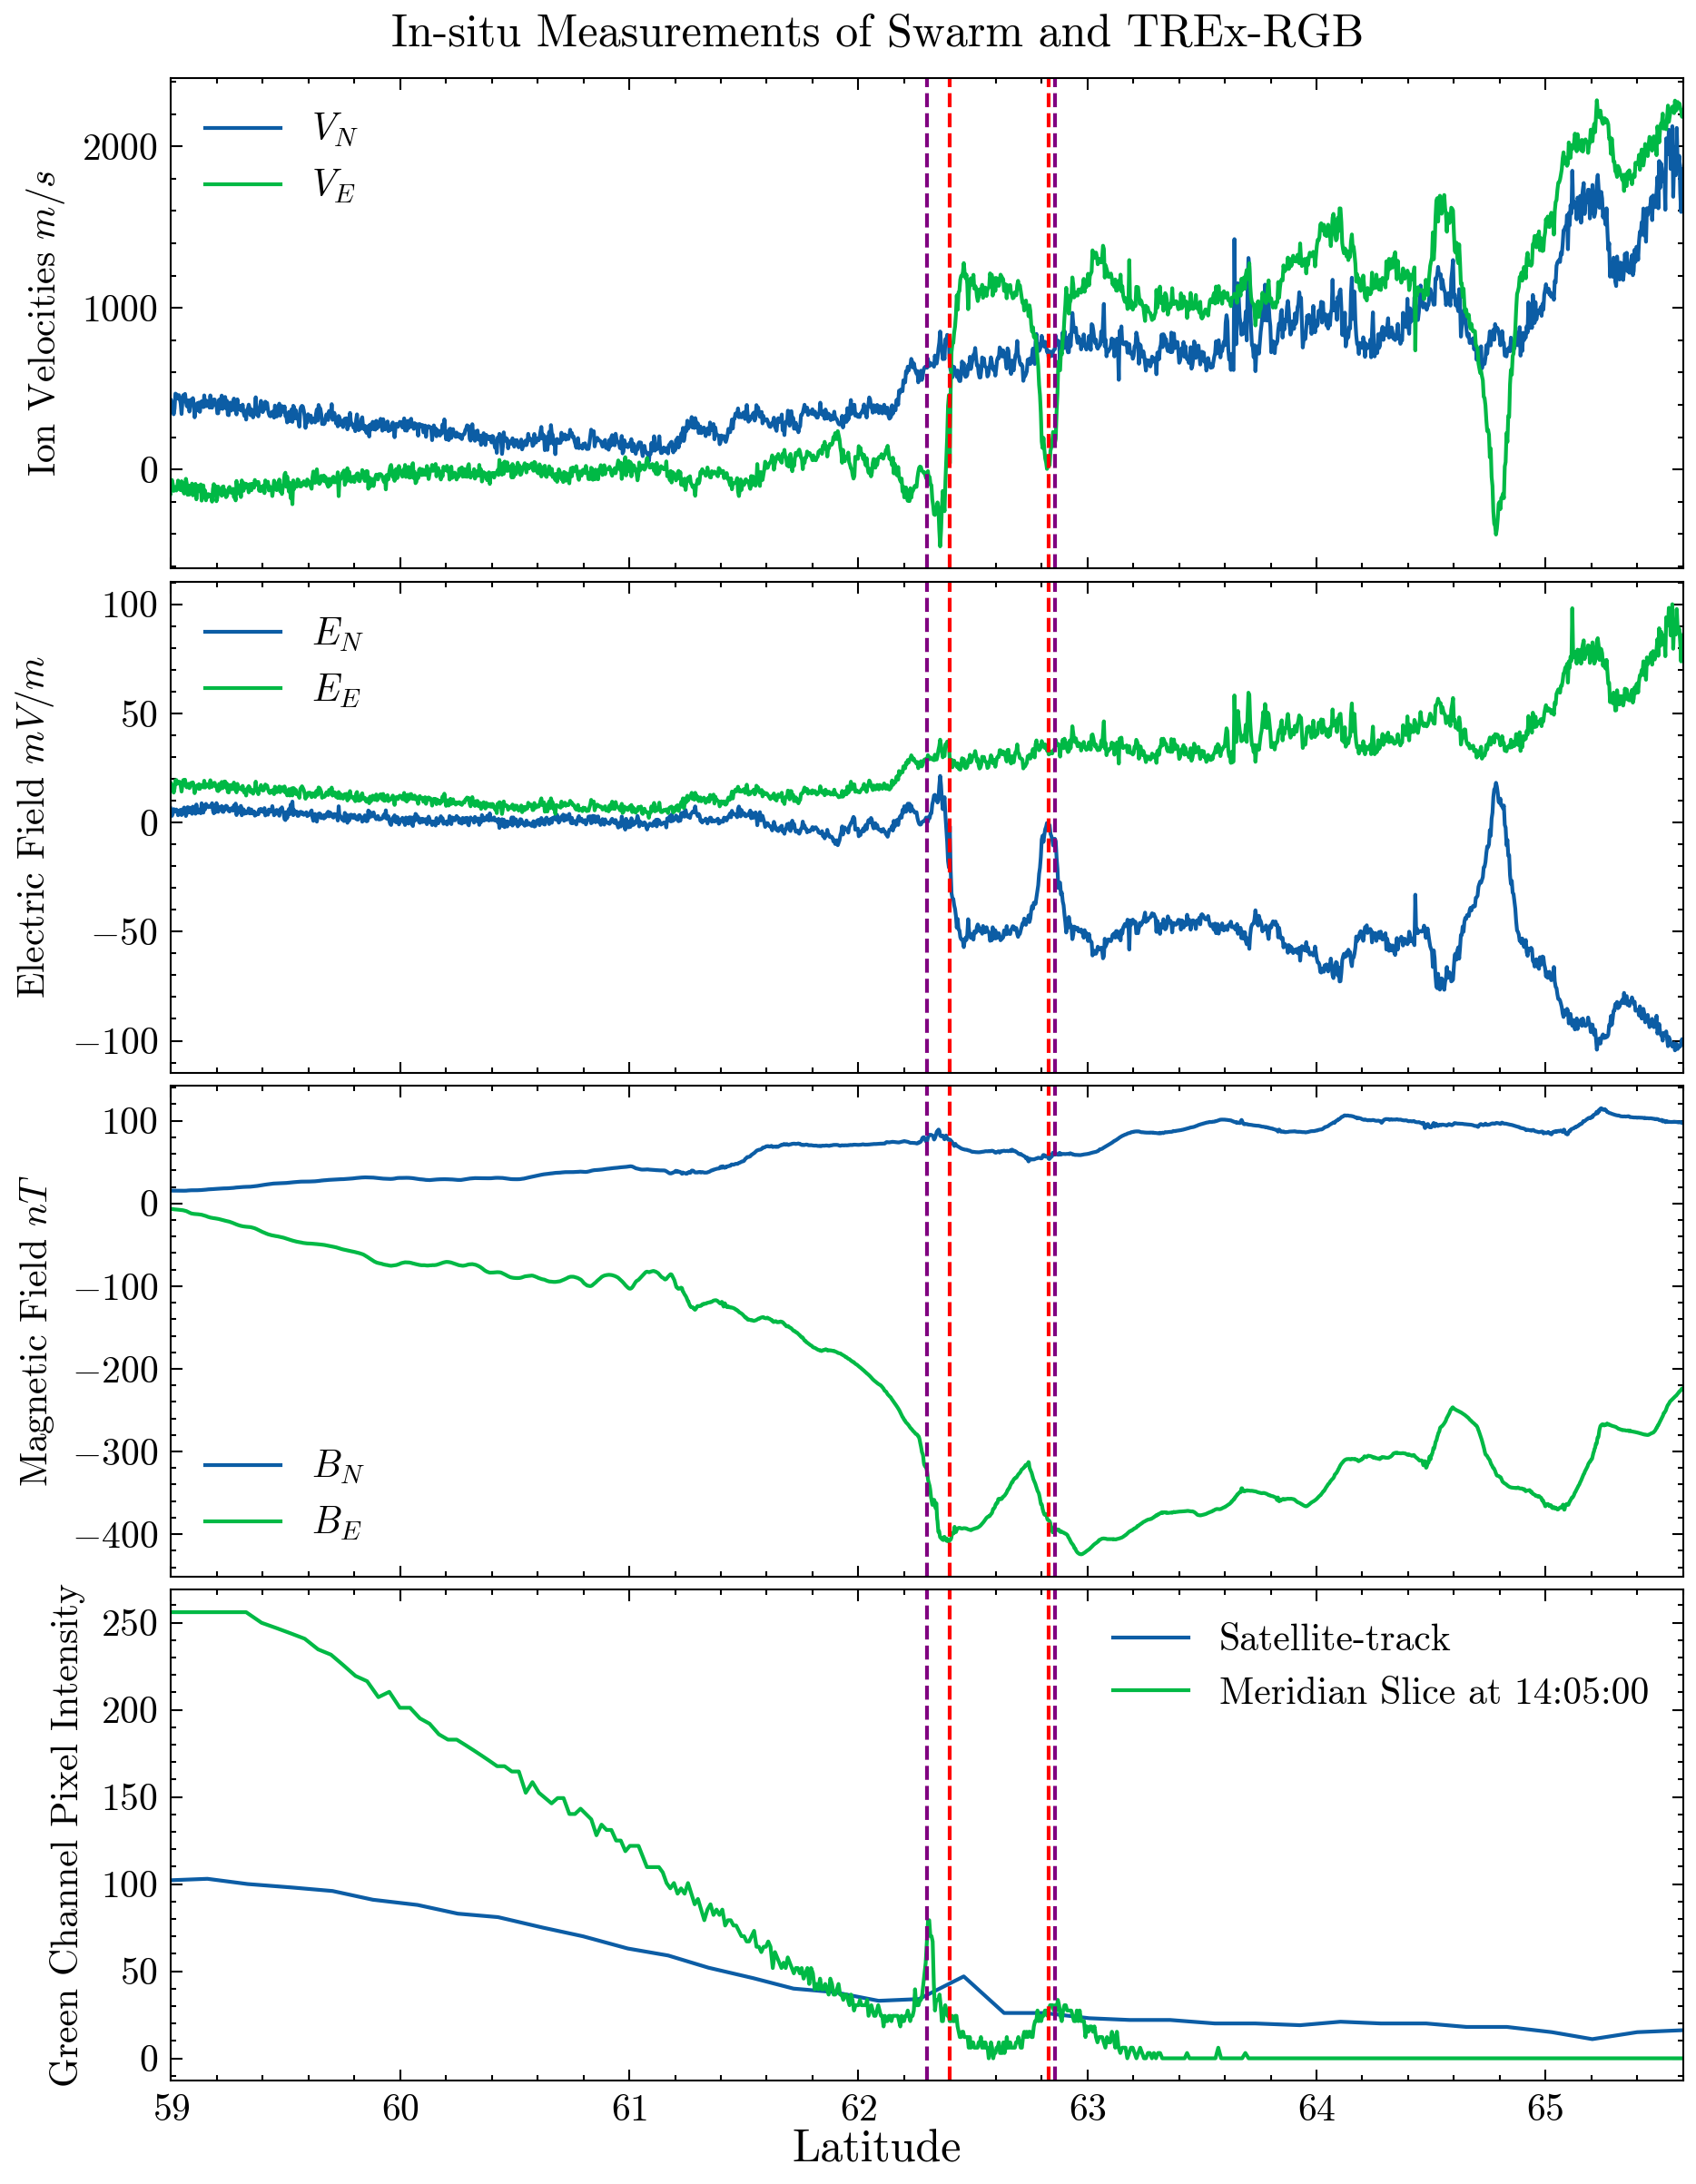

In [36]:
fig, axes = plt.subplots(figsize=(6,8), nrows=4, dpi=300, constrained_layout=True, sharex=True)
#We want B east and north, then E north and East and then the pixel intensity of the satellite and the pixel intensity of the keogram
axes[0].plot(lat16, VNEC[:,0], label=r"$V_{N}$")
axes[0].plot(lat16, VNEC[:, 1], label=r"$V_{E}$")
axes[1].plot(lat16, ENEC[:,0], label=r"$E_{N}$")
axes[1].plot(lat16, ENEC[:, 1], label=r"$E_{E}$")
axes[2].plot(lat50,BNEC[:,0], label=r"$B_{N}$")
axes[2].plot(lat50, BNEC[:, 1], label=r"$B_{E}$")
print(np.shape(area_intensity))
axes[3].plot(conjunction_obj.sat['lat'].T ,area_intensity[:,1], label="Satellite-track") #Change colors
axes[3].plot(im.get_coordinates()[:, 60, 1][:-1], im.get_array()[:, 60, 1]*256, label="Meridian Slice at 14:05:00") #change colors

axes[0].axvline(62.4, linestyle='dashed', color='red') #change color
axes[1].axvline(62.4, linestyle='dashed', color='red') #change color
axes[2].axvline(62.4, linestyle='dashed', color='red') #change color
axes[3].axvline(62.4, linestyle='dashed', color='red') #change color

axes[0].axvline(62.83, linestyle='dashed', color='red') #change color
axes[1].axvline(62.83, linestyle='dashed', color='red') #change color
axes[2].axvline(62.83, linestyle='dashed', color='red') #change color
axes[3].axvline(62.83, linestyle='dashed', color='red') #change color

axes[0].axvline(62.3, linestyle='dashed', color='purple') #change color
axes[1].axvline(62.3, linestyle='dashed', color='purple') #change color
axes[2].axvline(62.3, linestyle='dashed', color='purple') #change color
axes[3].axvline(62.3, linestyle='dashed', color='purple') #change color


axes[0].axvline(62.86, linestyle='dashed', color='purple') #change color
axes[1].axvline(62.86, linestyle='dashed', color='purple') #change color
axes[2].axvline(62.86, linestyle='dashed', color='purple') #change color
axes[3].axvline(62.86, linestyle='dashed', color='purple') #change color


plt.suptitle("In-situ Measurements of Swarm and TREx-RGB", y=1)
fig.supxlabel("Latitude")

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
plt.tight_layout(pad=0.3, w_pad=0.6, h_pad=0.35)

axes[0].set_ylabel(r"Ion Velocities $m/s$")
axes[1].set_ylabel(r"Electric Field $mV/m$")
axes[2].set_ylabel(r"Magnetic Field $nT$")
axes[3].set_ylabel(r"Green Channel Pixel Intensity")

axes[0].set_xlim(59, 65.6)
axes[1].set_xlim(59, 65.6)
axes[2].set_xlim(59, 65.6)
axes[3].set_xlim(59, 65.6)

In [38]:
import aacgmv2
#lat16, _, _ = aacgmv2.convert_latlon_arr(  # Converts to magnetic coordinates
                        in_lat=np.rad2deg(lat_sat_done_E),
                        in_lon=np.rad2deg(lon_sat_done_E),
                        height=alt,
                        dtime=datetime(2022,12,19,14,4),
                        method_code="G2A",
                    )
lat50, _, _ = aacgmv2.convert_latlon_arr(  # Converts to magnetic coordinates
                        in_lat=np.rad2deg(lat_sat_done_B),
                        in_lon=np.rad2deg(lon_sat_done_B),
                        height=alt,
                        dtime=datetime(2022,12,19,14,4),
                        method_code="G2A",
                    )
lat_satellite, _, _ = aacgmv2.convert_latlon_arr(  # Converts to magnetic coordinates
                        in_lat=conjunction_obj.sat['lat'],
                        in_lon=conjunction_obj.sat['lon'],
                        height=alt,
                        dtime=datetime(2022,12,19,14,4),
                        method_code="G2A",
                    )

print(len(lat16))
print(len(lat50))
print(lat16)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

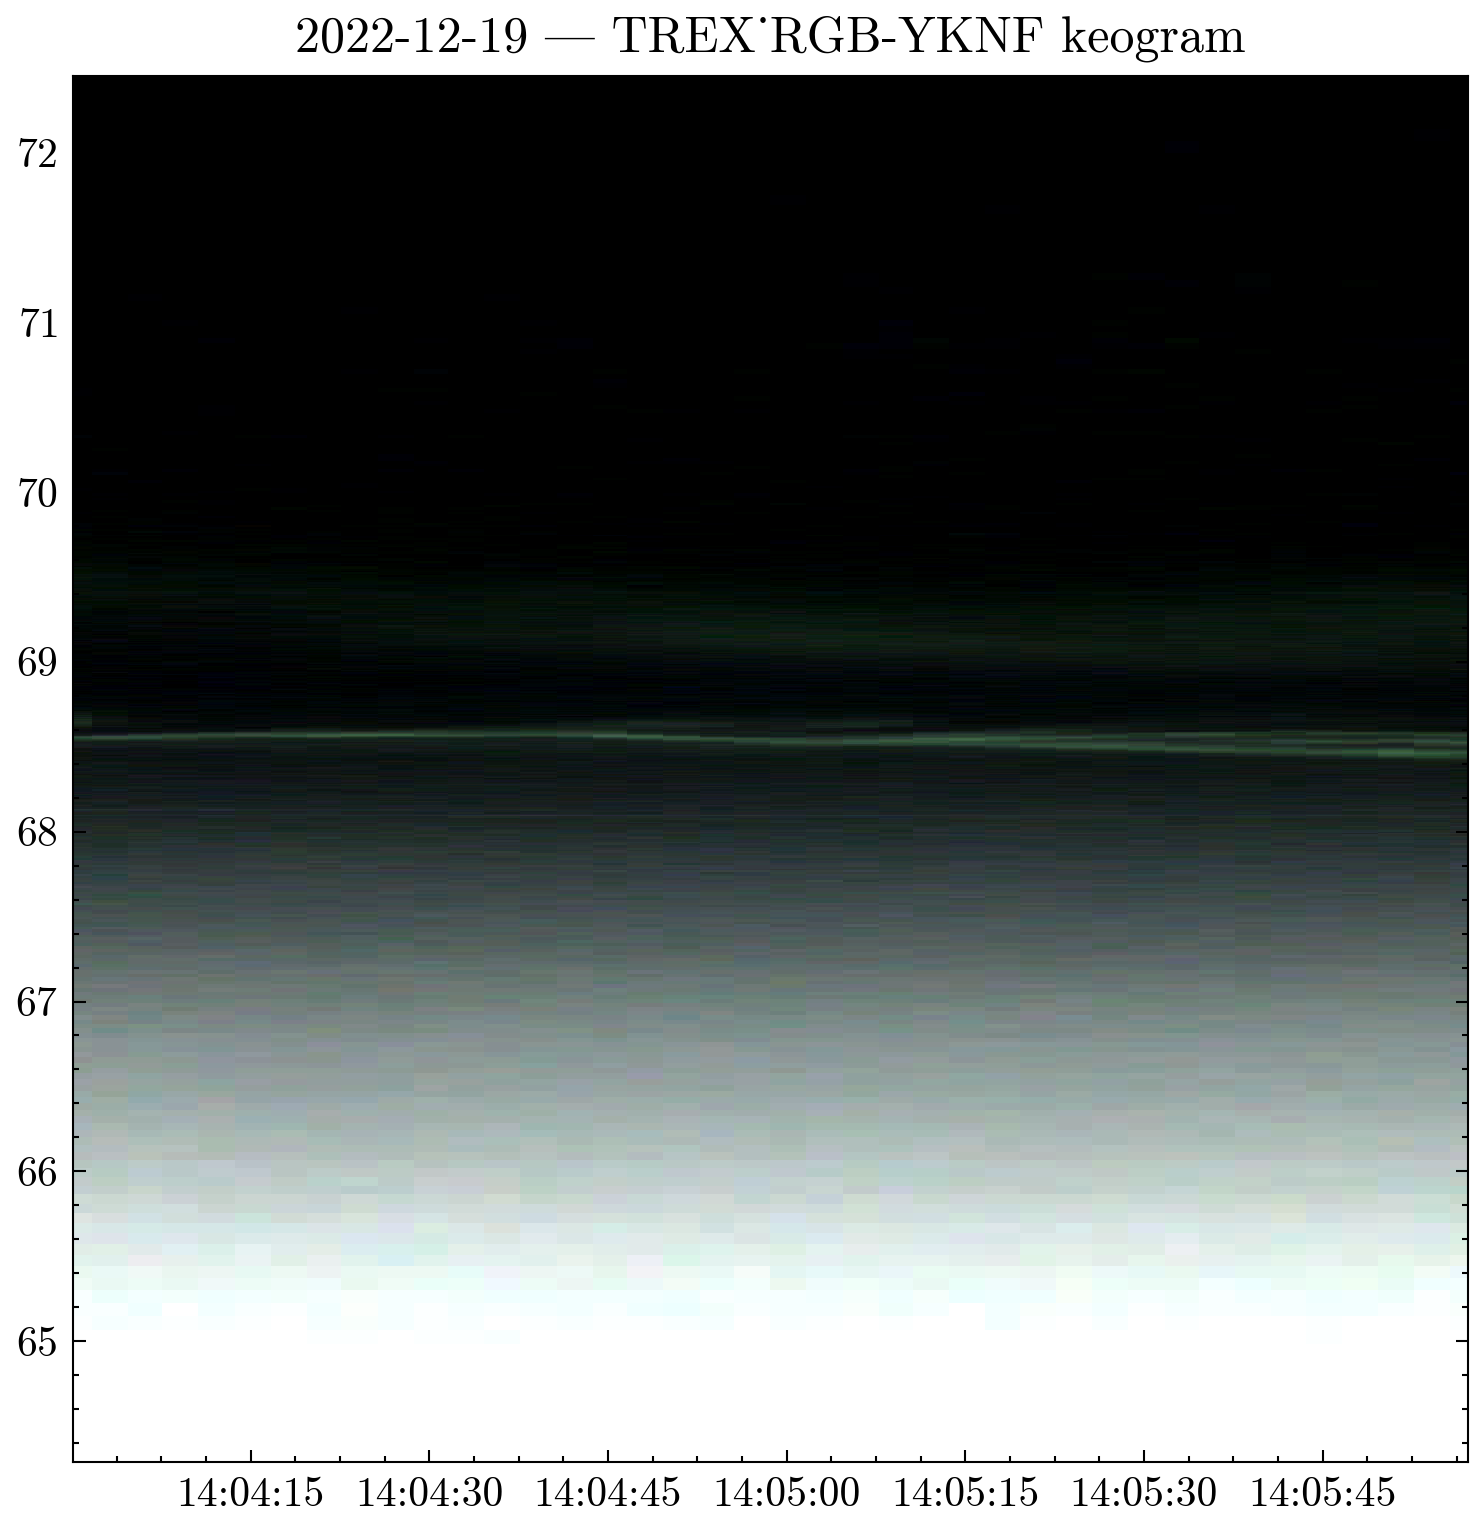

In [ ]:
fig, axes = plt.subplots(figsize=(6,6), dpi=300)
axes,im = asi.plot_keogram(ax=axes, aacgm=True)
x_data = im.get_coordinates()[:, 0, 1]
y_data = im.get_coordinates()[:, 1, 1]

(40, 3)


C:\Users\1101w\AppData\Local\Temp\ipykernel_8248\2499524964.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.3, w_pad=0.6, h_pad=0.35)


(65.0, 71.0)

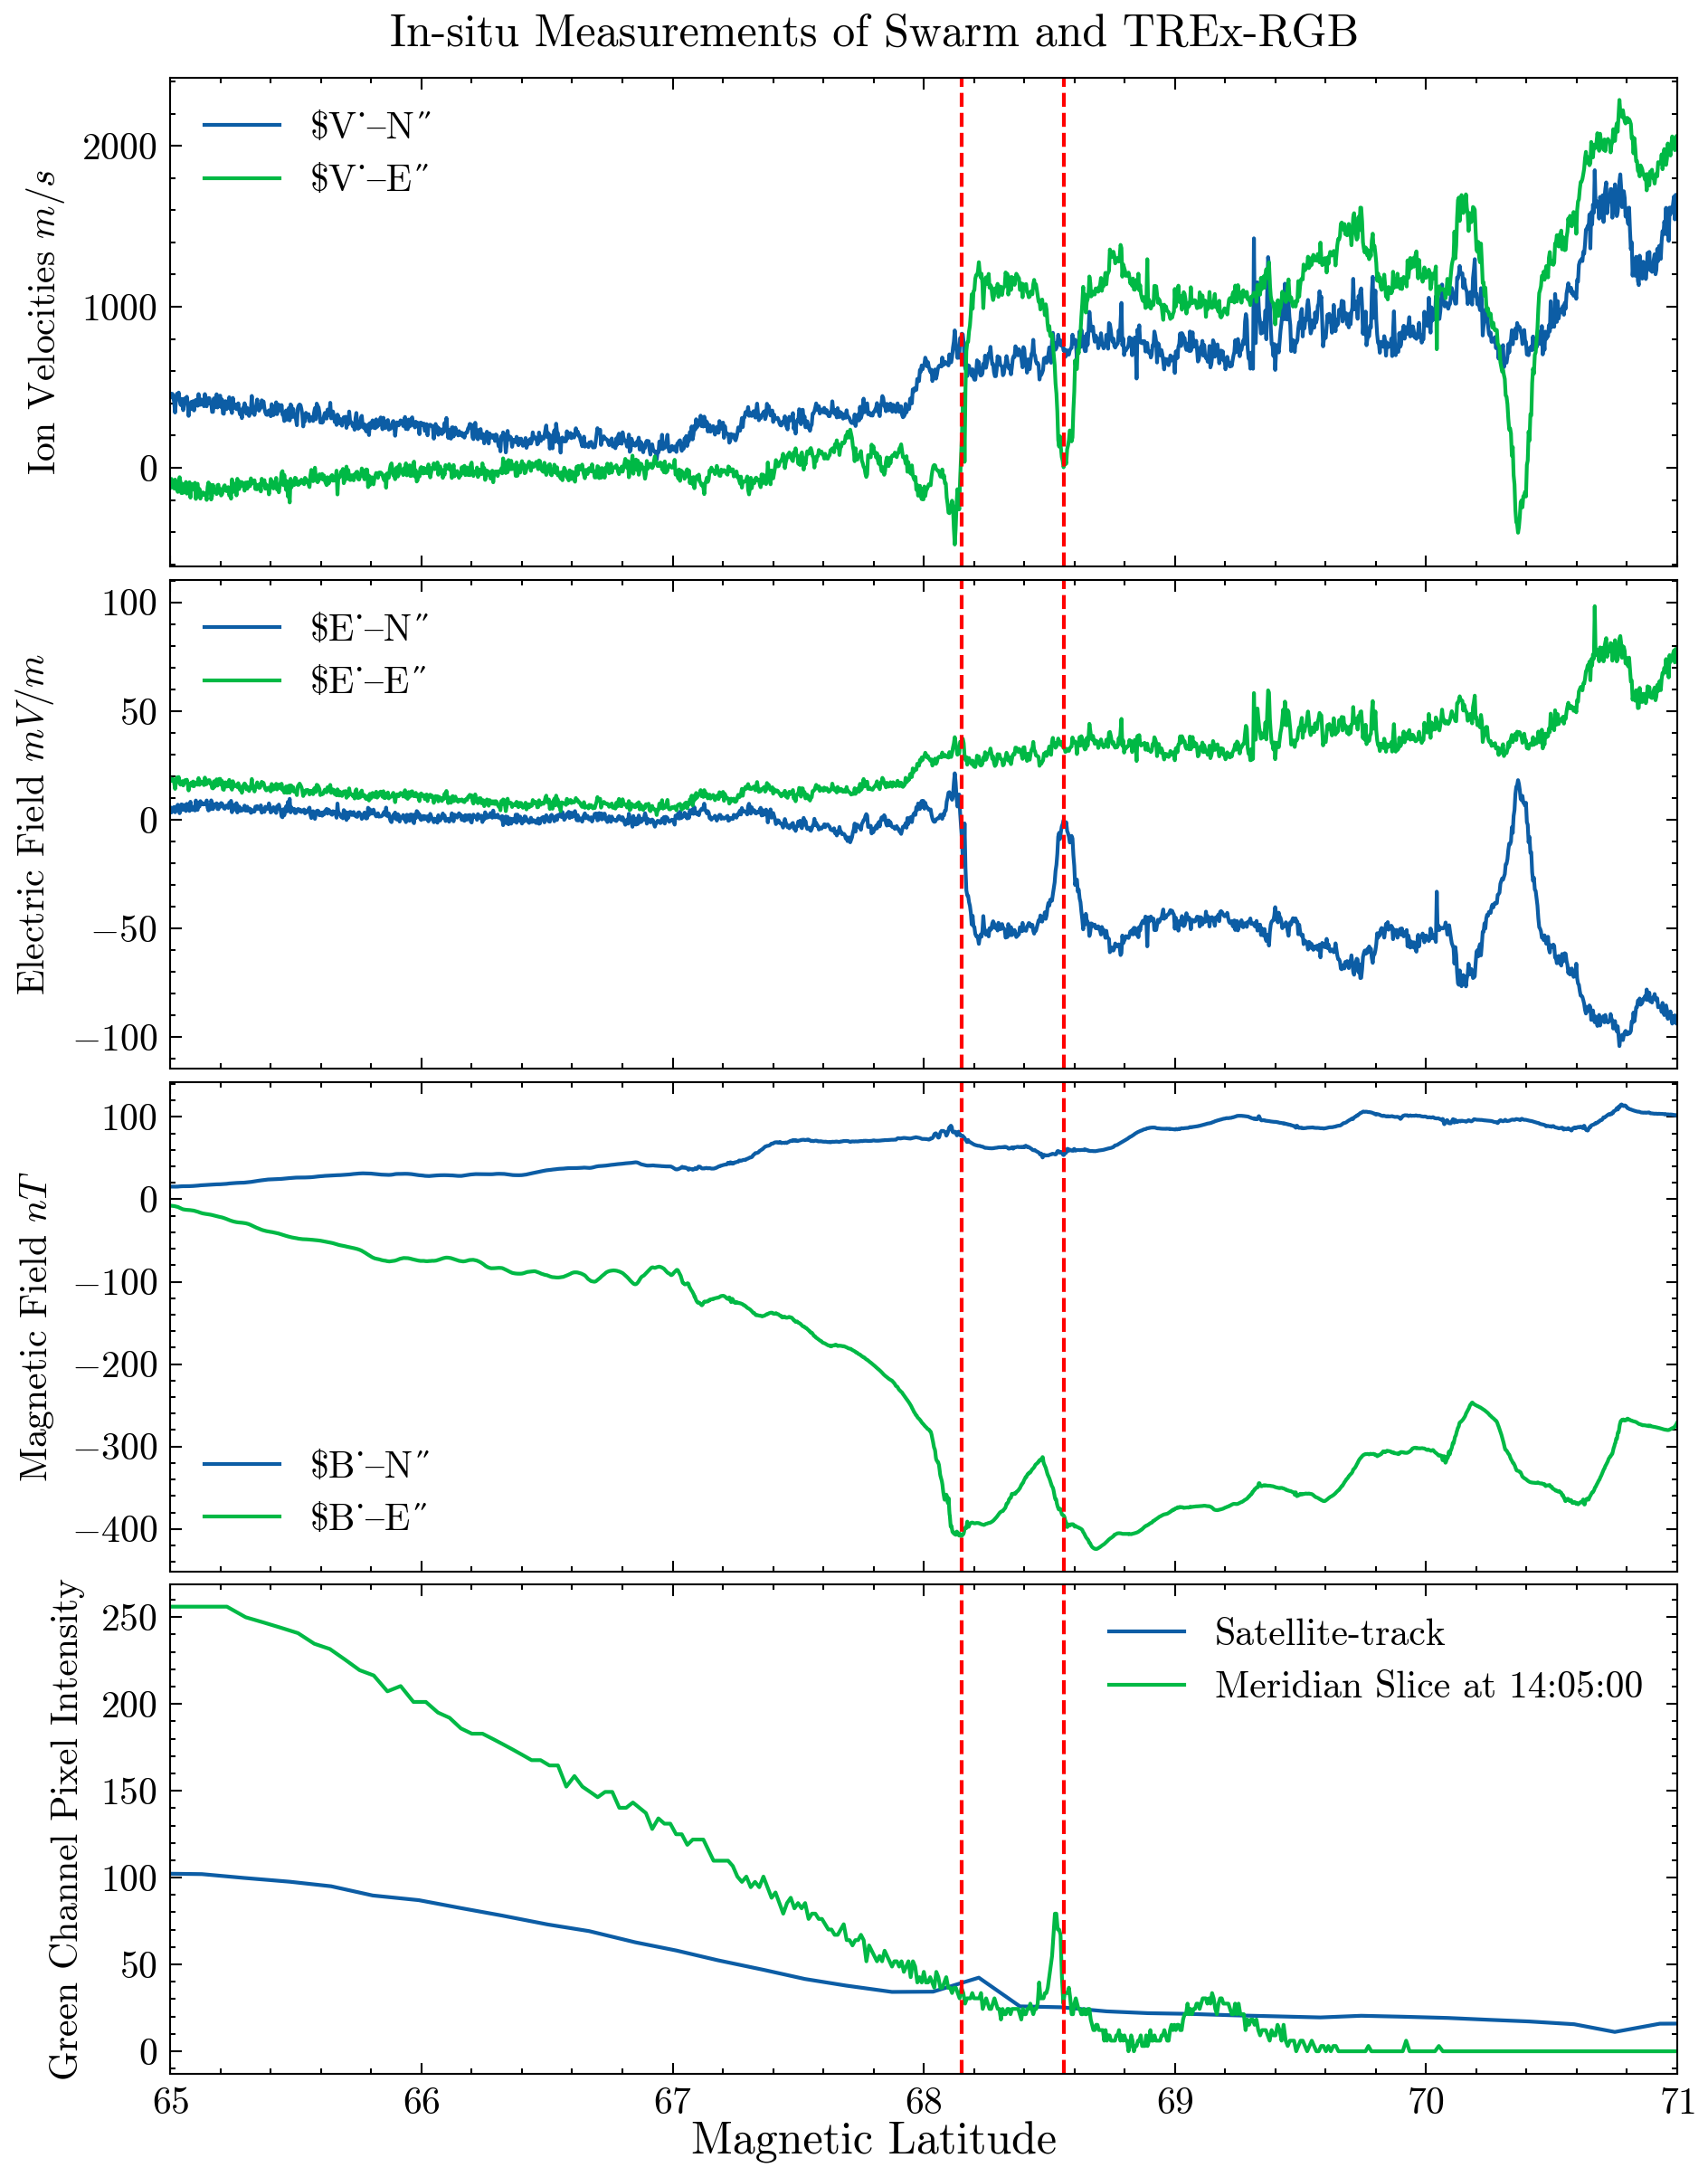

In [ ]:
fig, axes = plt.subplots(figsize=(6,8), nrows=4, dpi=300, constrained_layout=True, sharex=True)
#We want B east and north, then E north and East and then the pixel intensity of the satellite and the pixel intensity of the keogram
axes[0].plot(lat16, VNEC[:,0], label=r"$V_{N}")
axes[0].plot(lat16, VNEC[:, 1], label=r"$V_{E}")
axes[1].plot(lat16, ENEC[:,0], label=r"$E_{N}")
axes[1].plot(lat16, ENEC[:, 1], label=r"$E_{E}")
axes[2].plot(lat50,BNEC[:,0], label=r"$B_{N}")
axes[2].plot(lat50, BNEC[:, 1], label=r"$B_{E}")
print(np.shape(area_intensity))
axes[3].plot(lat_satellite ,area_intensity[:,1], label="Satellite-track") #Change colors
axes[3].plot(im.get_coordinates()[:, 60, 1][:-1], im.get_array()[:, 60, 1]*256, label="Meridian Slice at 14:05:00") #change colors

axes[0].axvline(68.15, linestyle='dashed', color='red') #change color
axes[1].axvline(68.15, linestyle='dashed', color='red') #change color
axes[2].axvline(68.15, linestyle='dashed', color='red') #change color
axes[3].axvline(68.15, linestyle='dashed', color='red') #change color

axes[0].axvline(68.56, linestyle='dashed', color='red') #change color
axes[1].axvline(68.56, linestyle='dashed', color='red') #change color
axes[2].axvline(68.56, linestyle='dashed', color='red') #change color
axes[3].axvline(68.56, linestyle='dashed', color='red') #change color


plt.suptitle("In-situ Measurements of Swarm and TREx-RGB", y=1)
fig.supxlabel("Magnetic Latitude")

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
plt.tight_layout(pad=0.3, w_pad=0.6, h_pad=0.35)

axes[0].set_ylabel(r"Ion Velocities $m/s$")
axes[1].set_ylabel(r"Electric Field $mV/m$")
axes[2].set_ylabel(r"Magnetic Field $nT$")
axes[3].set_ylabel(r"Green Channel Pixel Intensity")


axes[0].set_xlim(65, 71)
axes[1].set_xlim(65, 71)
axes[2].set_xlim(65, 71)
axes[3].set_xlim(65, 71)

Doesn't line up because the arc doesnt follow magnetic latitude, its more aligned east west due to the convection flow shape